In [64]:
import codecs, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
from IPython.display import display

In [65]:
%matplotlib inline

In [66]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
#sns.palplot(sns.color_palette("hls", 8))
#sns.palplot(sns.color_palette("husl", 8))

In [67]:
fLexFilms4="/Users/gilles/Downloads/Lexique4_min+filtr+cat+separ+corr3.tsv"

In [68]:
dfLexFilms4=pd.read_csv(filepath_or_buffer=fLexFilms4,sep="\t",header=None,skip_blank_lines=True,encoding="utf8")
dfLexFilms4.columns="graphie lemme cat infover genre nombre occurrences".split(" ")

In [69]:
dfLex4=dfLexFilms4.sort_values(["lemme","cat"]).reset_index().drop(columns="index")

In [70]:
catV=["VER","AUX"]
dfVerbes4=dfLex4.loc[dfLex4["cat"].isin(catV),:]
dfVerbes4=dfVerbes4.fillna("").groupby("graphie lemme infover genre nombre".split(" ")).sum().reset_index()

In [71]:
dfVerbes4.loc[:,"rangFWV"]=dfVerbes4.loc[:,"occurrences"].rank(ascending=False)
dfV4=dfVerbes4.sort_values("rangFWV").reset_index().drop(columns="index")
dfV4

,graphie,lemme,infover,genre,nombre,occurrences,rangFWV
0,est,être,ind:pre:3,,s,7111273.0,1.0
1,a,avoir,ind:pre:3,,s,3668058.0,2.0
2,ai,avoir,ind:pre:1,,s,2407163.0,3.0
3,as,avoir,ind:pre:2,,s,1021787.0,4.0
4,était,être,ind:imp:3,,s,982148.0,5.0
5,faire,faire,inf;,,,958743.0,6.0
6,va,aller,ind:pre:3,,s,878202.0,7.0
7,sais,savoir,ind:pre:1,,s,862224.0,8.0
8,suis,suivre,ind:pre:1,,s,834976.0,9.0
9,es,être,ind:pre:2,,s,697229.0,10.0


## Filtrer les scories de Lexique4
- quelques formes fléchies sont notées avec des lemmes qui ne correspondent pas à un verbe
- quelques formes ne sont pas identifiées : infover = NaN
- une forme est indiquée comme impératif 3S

Dans tous les cas, on remplace l'étiquette de Lexique.org par l'étiquette Grace

In [72]:
dfV4.infover.unique()

array([u'ind:pre:3', u'ind:pre:1', u'ind:pre:2', u'ind:imp:3', u'inf;',
       u'par:pas:', u'inf', u'imp:pre:2', u'ind:imp:1', u'ind:fut:3',
       u'sub:pre:3', u'cnd:pre:3', u'cnd:pre:1', u'imp:pre:1', '',
       u'ind:imp:2', u'cnd:pre:2', u'ind:fut:1', u'ind:fut:2', u'par:p',
       u'sub:pre:2', u'ind:pas:3', u'sub:pre:1', u'ind:pas:1',
       u'ind:pas:2', u'imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:3s;',
       u'imp:pre:2p;ind:pre:2p;par:pas;', u'imp:pre:1p;ind:pre:1p;',
       u'sub:imp:3', u'ind:pas:3s;', u'sub:imp:1', u'imp:pre:3',
       u'sub:imp:2'], dtype=object)

In [73]:
def infover2Case(lRow):
    result=""
    lInfover=lRow["infover"]
    lNombre=lRow["nombre"]
    if isinstance(lInfover,unicode):
        if lInfover in [u'imp:pre:2p;ind:pre:2p;par:pas;',
       u'imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:3s;',
       u'imp:pre:1p;ind:pre:1p;']:
            print lRow["graphie"],lRow["lemme"]
        else:
            if lInfover[:3]==u"inf":
                result=u"inf"
            elif lInfover==u"par:p":
                result="pP"
            elif lInfover[:8]==u"par:pas:":
                if lNombre in ["s","p"]:
                    lNombre=lNombre.upper()
                else:
                    print lRow
                lGenre=lRow["genre"]
                if lGenre in ["m","f"]:
                    lGenre=lGenre.upper()
                else:
                    print lRow
                result="pp"+lGenre+lNombre
            else:
                if lNombre in ["s","p"]:
                    lNombre=lNombre.upper()
                    if lInfover[:8]==u"ind:pre:":
                        result="pi"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:imp:":
                        result="ii"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:fut:":
                        result="fi"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:pas:":
                        result="ai"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"imp:pre:":
                        result="pI"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"sub:pre:":
                        result="ps"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"sub:imp:":
                        result="is"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"cnd:pre:":
                        result="pc"+lInfover[8]+lNombre
                else:
                    print lRow               
    return result

print "Problèmes de lemme"
dfV4["case"]=dfV4.apply(infover2Case,axis=1)

Problèmes de lemme
monte monte
faîtes faîte
partons parton
monte monte
excitons exciton
transposons transposon


### aggréger les comptes des formes artificiellement séparées par Lexique4
- groupby graphie, lemme, case
 - AUX et VER ensemble pour un même lemme
 - les infover inf et inf; sont regroupés via la case inf
- recalcul du rang après regroupements

In [75]:
dfV4=dfV4[~dfV4["case"].isin(["","pI3S"])]
dfV4=dfV4.groupby("graphie lemme case".split(" "))[["occurrences"]].sum().reset_index()
dfV4["rangFWV"]=dfV4["occurrences"].rank(ascending=False)
dfV4.sort_values("rangFWV").head()

,graphie,lemme,case,occurrences,rangFWV
42095,est,être,pi3S,7111273.0,1.0
2,a,avoir,pi3S,3668058.0,2.0
3304,ai,avoir,pi1S,2407163.0,3.0
6631,as,avoir,pi2S,1021787.0,4.0
105197,était,être,ii3S,982148.0,5.0


La fréquence cumulée pour chaque case donne une idée de la présence de la case dans le corpus. Mais cette fréquence est largement influencée par les formes de lexèmes extrèmement fréquents. La troisième personne du singulier du présent indicatif se situe largement au dessus de toutes les autres formes avec 17M. L'étude de la médiane ou du premier quartile donne une image moins biaisée des rapports de distribution entre les cases.

In [76]:
dfCasesTokens=dfV4[dfV4["case"]!=""].groupby("case")[["occurrences"]].sum().sort_values("occurrences",ascending=False)
dfCasesTokens.head()

,occurrences
case,
pi3S,17617887.0
inf,11917396.0
pi1S,9144293.0
ppMS,7704344.0
pi2S,4043391.0


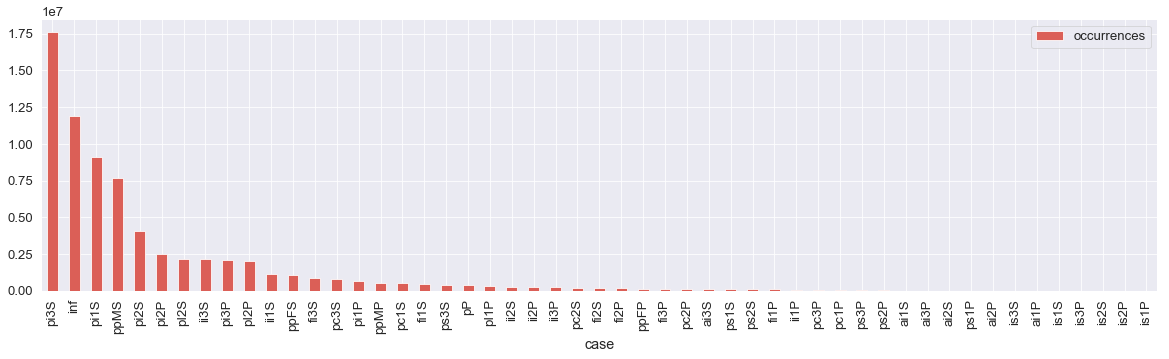

In [77]:
ax=dfCasesTokens.plot(kind="bar",figsize=(20,5))
#ax.set_yscale('log')


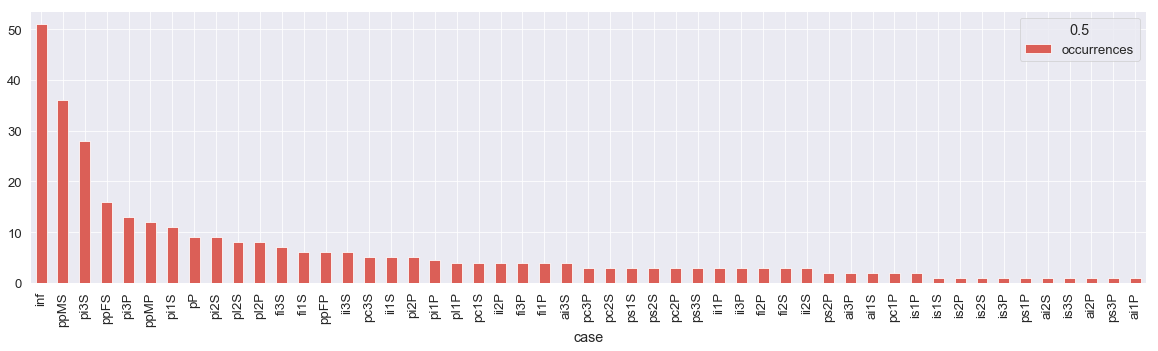

In [78]:
dfV4[dfV4["case"]!=""].groupby("case")[["occurrences"]].quantile(q=0.5).sort_values("occurrences",ascending=False).plot(kind="bar",figsize=(20,5))

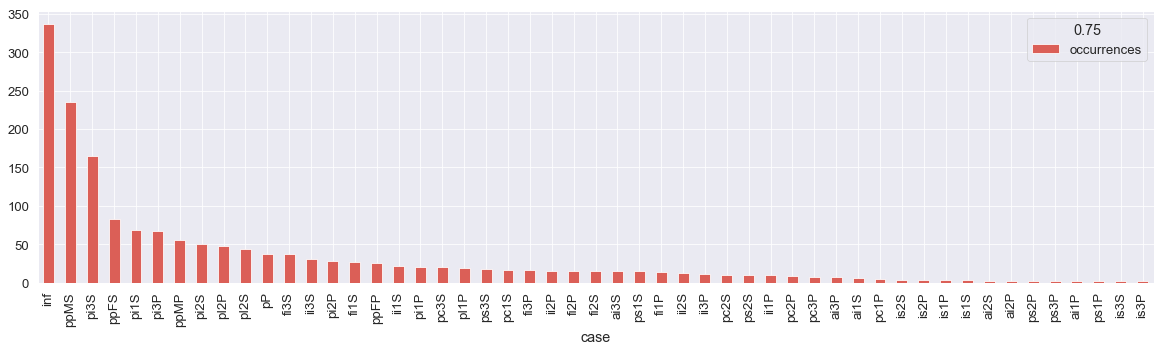

In [79]:
dfV4[dfV4["case"]!=""].groupby("case")[["occurrences"]].quantile(q=0.75).sort_values("occurrences",ascending=False).plot(kind="bar",figsize=(20,5))

In [80]:
dfV4["nb"]=1
dfV4.head()

,graphie,lemme,case,occurrences,rangFWV,nb
0,-tu,taire,ppMS,8.0,49603.5,1
1,=,égaler,pi3S,4218.0,1487.0,1
2,a,avoir,pi3S,3668058.0,2.0,1
3,a,avoir,ppMS,1.0,94632.5,1
4,abaissa,abaisser,ai3S,5.0,58202.5,1


### Lexèmes avec surabondance
Pour les lexèmes sujets à surabondance, il est possible d'avoir plus de 51 formes listées mais une partie des lexèmes de la liste ne font pas partie des surabondants.

In [81]:
dfSurabondances=dfV4.groupby(["lemme","case"]).agg({"graphie":lambda x: "-".join(x),"nb":"count"}).reset_index()
dfL4Surabondances=dfSurabondances[dfSurabondances["nb"]>1]
dfL4Surabondances.to_csv(path_or_buf="PB-Lex4-Surabondances.csv",sep="\t",encoding="utf8")

In [82]:
dfL4Surabondances

,lemme,case,nb,graphie
52,abandonner,ii3P,2,abandonnaient-abandonné
53,abandonner,ii3S,2,abandonnait-abandonné
56,abandonner,pI2P,2,abandonner-abandonnez
67,abandonner,pi2P,2,abandonner-abandonnez
117,abattre,pi2P,2,abattez-abattre
266,aborder,ii3P,2,abordaient-abordé
347,aboyer,pi2P,2,aboyer-aboyez
520,absorber,ii3P,2,absorbaient-absorbé
553,absoudre,pi2P,2,absolvez-absoudre
617,abuser,ii3P,2,abusaient-abusé


In [83]:
dfL4LexFormesV=dfV4.groupby("lemme")[["occurrences","nb"]].count()
dfL4LexFormesV[dfL4LexFormesV["occurrences"]>51].index.tolist()

[u'aimer',
 u'aller',
 u'appeler',
 u'asseoir',
 u'avoir',
 u'devoir',
 u'donner',
 u'effrayer',
 u'envoyer',
 u'essayer',
 u'laisser',
 u'payer',
 u'penser',
 u'porter',
 u'pouvoir',
 u'savoir',
 u'trouver',
 u'vouloir',
 u'\xeatre']

### regroupement des formes de lexème pour une même case

In [84]:
dfL4LexCasesV=dfV4.groupby(["lemme","case"]).sum().reset_index()

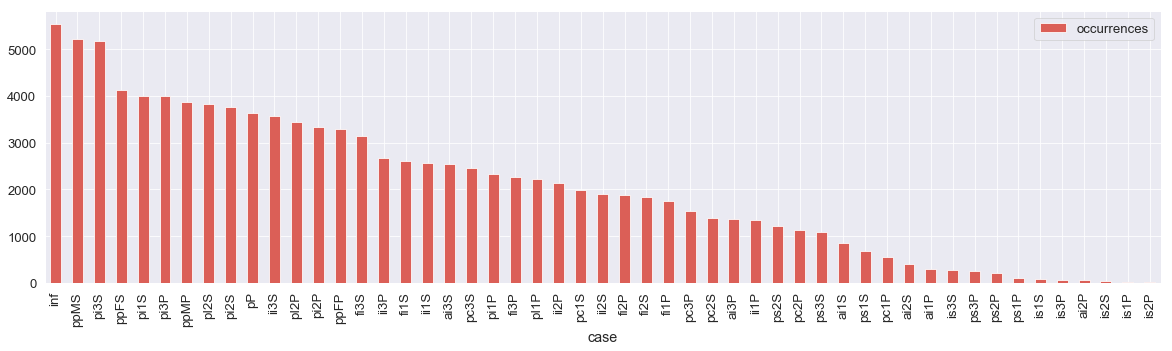

In [85]:
dfCasesTypes=dfL4LexCasesV[dfL4LexCasesV["case"]!=""].groupby("case")[["occurrences"]].count().sort_values("occurrences",ascending=False)
dfCasesTypes.plot(kind="bar",figsize=(20,5))

# French Plat from Stump & Finkel (2013)

## liste des microclasses de paradigmes radicaux

In [27]:
with codecs.open("Stump12.data","r",encoding="utf8") as fInput:
    stump12=[l.strip() for l in fInput.readlines()]

In [34]:
lStemIx={}
stemIx=0
for l in stump12[6:]:
    if l.startswith("CONJ"):
        print l
        stemIx+=1
        lStemIx[stemIx]=[]
        lStemIx[stemIx].append(re.split(ur"\s+",l))
    elif l.startswith("LEXEME"):
        break
    else:
        lStemIx[stemIx].append(re.split(ur"\s+",l))

CONJ      Stem1 Stem2 Stem3 Stem4 Stem5 Stem6 Stem7
CONJ      Stem8 Stem9 Stem10
CONJ      Stem10a Stem11 Stem12 Stem13
CONJ      Stem14 Stem15 Stem16 Stem17 Stem18 Stem19


In [ ]:
stem1=pd.DataFrame(lStemIx[1][2:-1]).set_index(0)
stem2=pd.DataFrame(lStemIx[2][2:-1]).set_index(0)
stem3=pd.DataFrame(lStemIx[3][2:-1]).set_index(0)
stem4=pd.DataFrame(lStemIx[4][2:-1]).set_index(0)

In [57]:
stem1.columns=["stem%02d"%(i+1) for i in range(7)]
stem2.columns=["stem%02d"%(i+1) for i in range(7,10)]
stem3.columns=["stem10a"]+["stem%02d"%(i+1) for i in range(10,13)]
stem4.columns=["stem%02d"%(i+1) for i in range(13,19)]

In [133]:
stems=pd.concat([stem1,stem2,stem3,stem4],axis=1)
stems#.head(25)

,stem01,stem02,stem03,stem04,stem05,stem06,stem07,stem08,stem09,stem10,stem10a,stem11,stem12,stem13,stem14,stem15,stem16,stem17,stem18,stem19
0,,,,,,,,,,,,,,,,,,,,
ÊTRE,-sɥi,-ɛ,!sɔm,!ɛt,-sɔ̃,-et,-etj,-fy,-fy,-sə,-səʁ,-swa,-swaj,-swa,-swaj,-swaj,-etʁ,-et,-ete,-ete
AVOIR,-ɛ,-a,-av,-av,-ɔ̃,-av,-avj,-y,-y,-o,-oʁ,-ɛ,-ɛj,-ɛ,-ɛj,-ɛj,-avwaʁ,-ɛj,-y,-y
AIMER,-,-,-,-,-,-,-j,-ɛ,-a,-ə,-əʁ,-,-j,-,-,-,-e,-,-e,-e
COLLER,-ɔl,-ɔl,-ol,-ol,-ɔl,-ol,-olj,-olɛ,-ola,-olə,-oləʁ,-ɔl,-olj,-ɔl,-ol,-ol,-ole,-ol,-ole,-ole
BEURRER,-œʁ,-œʁ,-øʁ,-øʁ,-œʁ,-øʁ,-øʁj,-øʁɛ,-øʁa,-œʁə,-œʁəʁ,-œʁ,-øʁj,-œʁ,-øʁ,-øʁ,-øʁe,-øʁ,-øʁe,-øʁe
DÉJEUNER,-,-,-,-,-,-,-j,-ɛ,-a,-ə,-əʁ,-,-j,-,-,-,-e,-,-e,-e
ÉCROUER,-,-,-,-,-,-,-j,-ɛ,-a,-,-ʁ,-,-j,-,-,-,-e,-,-e,-e
ÉCHOUER,-u,-u,-w,-w,-u,-w,-uj,-wɛ,-wa,-u,-uʁ,-u,-uj,-u,-w,-w,-we,-w,-we,-we
REFLUER,-,-,-,-,-,-,-j,-ɛ,-a,-,-ʁ,-,-j,-,-,-,-e,-,-e,-e


## Liste des microclasses de paradigmes morphosyntaxiques
- génération des étiquettes de cellules
- génération des patrons de formes pour les microclasses

In [163]:
noAffix="inf ppMS ppMP ppFS ppFP pi1S pi2S pi3S pi3P".split(" ")+ \
        "ps1S ps2S ps3S ps3P ai1S ai2S ai3S is3S pI2S".split(" ")
def inflectStem(microclasse,case):
    stem=stems[stems.index==microclasse][selectStem[case]].values[0]
    if case in noAffix:
        result=stem
    elif "1P" in case:
        if "!" not in stem:
            if case=="pc1P":
                result=stem+u"jɔ̃"
            elif case=="fi1P":
                result=stem+u"ʁɔ̃"
            elif case=="ai1P":
                result=stem+u"m"
            else:
                result=stem+u"ɔ̃"
        else:
            result=stem
    elif "2P" in case:
        if "!" not in stem:
            if case=="pc2P":
                result=stem+u"je"
            elif case=="fi2P":
                result=stem+u"ʁe"
            elif case=="ai2P":
                result=stem+u"t"
            else:
                result=stem+u"e"
        else:
            result=stem
    elif case=="ai3P":
        result=stem+u"ʁ"
    elif "fi" in case:
        result=stem+u"ʁ"
        if "1S" in case:
            result=result+u"e"
        elif "S" in case:
            result=result+u"a"
        elif "3P" in case:
            result=result+u"ɔ̃"
    elif "pc" in case:
        result=stem+u"ʁɛ"
    elif "ii" in case:
        result=stem+u"ɛ"
    elif "pP"==case:
        result=stem+u"ɑ̃"
    else:
        result="???"
    return result

In [168]:
for c in selectStem:
    print c,inflectStem(u"LEVER",c)


ii1P -əvjɔ̃
ii1S -əvɛ
pP -əvɑ̃
inf -əve
ai3S -əva
ai3P -əvɛʁ
ai1P -əvam
ii3S -əvɛ
ps3S -ɛv
ps3P -ɛv
ii3P -əvɛ
pi2S -ɛv
ai1S -əvɛ
pi2P -əve
ppFS -əve
ppFP -əve
ps1P -əvjɔ̃
ps1S -ɛv
pI2S -ɛv
fi2P -ɛvəʁe
fi2S -ɛvəʁa
pI2P -əve
ps2P -əvje
ps2S -ɛv
ai2P -əvat
ai2S -əva
pc2P -ɛvəʁje
pc2S -ɛvəʁɛ
ii2P -əvje
pi1S -ɛv
pi1P -əvɔ̃
ii2S -əvɛ
pi3P -ɛv
pi3S -ɛv
ppMS -əve
pc3S -ɛvəʁɛ
pc3P -ɛvəʁɛ
pc1P -ɛvəʁjɔ̃
pc1S -ɛvəʁɛ
fi3S -ɛvəʁa
fi3P -ɛvəʁɔ̃
ppMP -əve
fi1P -ɛvəʁɔ̃
fi1S -ɛvəʁe
pI1P -əvɔ̃


In [120]:
selectStem={
     'ii1P': 'stem07',
     'ii1S': 'stem06',
     'ii2P': 'stem07',
     'ii2S': 'stem06',
     'ii3P': 'stem06',
     'ii3S': 'stem06',
     'ai1P': 'stem09',
     'ai1S': 'stem08',
     'ai2P': 'stem09',
     'ai2S': 'stem09',
     'ai3P': 'stem08',
     'ai3S': 'stem09',
     'is1P': 'stem09',
     'is1S': 'stem09',
     'is2P': 'stem09',
     'is2S': 'stem09',
     'is3P': 'stem09',
     'is3S': 'stem09',
    }

In [134]:
stemSpaces={
     'stem01': ['pi1S'],
     'stem02': 'pi2S pi3S'.split(" "),
     'stem03': ['pi1P'],
     'stem04': ['pi2P'],
     'stem05': ['pi3P'],
     'stem06': "ii1S ii2S ii3S ii3P".split(" "),
     'stem07': "ii1P ii2P".split(" "),
     'stem08': "ai1S ai3P".split(" "),
     'stem09': "ai2S ai3S ai1P ai2P".split(" "),
     'stem10': "fi1S fi2S fi3S fi1P fi2P fi3P pc1S pc2S pc3S pc3P".split(" "),
     'stem10a': "pc1P pc2P".split(" "),
     'stem11': "ps1S ps2S ps3S ps3P".split(" "),
     'stem12': "ps1P ps2P".split(" "),
     'stem13': ['pI2S'],
     'stem14': ['pI1P'],
     'stem15': ['pI2P'],
     'stem16': ['inf'],
     'stem17': ['pP'],
     'stem18': "ppMS ppMP".split(" "),
     'stem19': "ppFS ppFP".split(" "),
            }
stemSpaces

{'stem01': ['pi1S'],
 'stem02': ['pi2S', 'pi3S'],
 'stem03': ['pi1P'],
 'stem04': ['pi2P'],
 'stem05': ['pi3P'],
 'stem06': ['ii1S', 'ii2S', 'ii3S', 'ii3P'],
 'stem07': ['ii1P', 'ii2P'],
 'stem08': ['ai1S', 'ai3P'],
 'stem09': ['ai2S', 'ai3S', 'ai1P', 'ai2P'],
 'stem10': ['fi1S',
  'fi2S',
  'fi3S',
  'fi1P',
  'fi2P',
  'fi3P',
  'pc1S',
  'pc2S',
  'pc3S',
  'pc3P'],
 'stem10a': ['pc1P', 'pc2P'],
 'stem11': ['ps1S', 'ps2S', 'ps3S', 'ps3P'],
 'stem12': ['ps1P', 'ps2P'],
 'stem13': ['pI2S'],
 'stem14': ['pI1P'],
 'stem15': ['pI2P'],
 'stem16': ['inf'],
 'stem17': ['pP'],
 'stem18': ['ppMS', 'ppMP'],
 'stem19': ['ppFS', 'ppFP']}

In [136]:
selectStem={}
for s,cells in stemSpaces.iteritems():
    for c in cells:
        selectStem[c]=s
selectStem

{'ai1P': 'stem09',
 'ai1S': 'stem08',
 'ai2P': 'stem09',
 'ai2S': 'stem09',
 'ai3P': 'stem08',
 'ai3S': 'stem09',
 'fi1P': 'stem10',
 'fi1S': 'stem10',
 'fi2P': 'stem10',
 'fi2S': 'stem10',
 'fi3P': 'stem10',
 'fi3S': 'stem10',
 'ii1P': 'stem07',
 'ii1S': 'stem06',
 'ii2P': 'stem07',
 'ii2S': 'stem06',
 'ii3P': 'stem06',
 'ii3S': 'stem06',
 'inf': 'stem16',
 'pI1P': 'stem14',
 'pI2P': 'stem15',
 'pI2S': 'stem13',
 'pP': 'stem17',
 'pc1P': 'stem10a',
 'pc1S': 'stem10',
 'pc2P': 'stem10a',
 'pc2S': 'stem10',
 'pc3P': 'stem10',
 'pc3S': 'stem10',
 'pi1P': 'stem03',
 'pi1S': 'stem01',
 'pi2P': 'stem04',
 'pi2S': 'stem02',
 'pi3P': 'stem05',
 'pi3S': 'stem02',
 'ppFP': 'stem19',
 'ppFS': 'stem19',
 'ppMP': 'stem18',
 'ppMS': 'stem18',
 'ps1P': 'stem12',
 'ps1S': 'stem11',
 'ps2P': 'stem12',
 'ps2S': 'stem11',
 'ps3P': 'stem11',
 'ps3S': 'stem11'}